# EDA für mix_master.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# CSV einlesen
df = pd.read_csv("/Users/michel/Documents/Data Scientist/Abschlussprojekt Song empfehlung/data/raw/mix_master.csv")
df

,track_id,track_name,artist_name,album_name,release_date,popularity,duration_ms,explicit,artist_genres,release_year
0,4AEpB1NhDW9Hgk9hZKcG5R,Bistro Europa,Global Genius,"This World Over, Vol. 2",2022-04-01,29,210913,False,NaN,2022
1,44UVE3OdLbPEap9VtrAZEU,Obrigada Meu Amor,Global Genius,"This World Over, Vol. 1",2022-04-01,25,138987,False,NaN,2022
2,1EeH3JZvWaEIOfLGx18EWc,Moon Over Milan,Global Genius,"This World Over, Vol. 2",2022-04-01,23,153333,False,NaN,2022
3,4Z7Y8wXZW5m1MskicNK6i8,Jazzy Wanderer,Global Genius,"This World Over, Vol. 1",2022-04-01,22,227859,False,NaN,2022
4,4gL1eTz74RnX7wPK5wB7tY,Say Everything,Global Genius,New Folk,2019-08-15,20,230995,False,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
2706,42GVFip18j7QYynp0uhEpx,Don't Be Shy,"Tiësto, KAROL G",DRIVE,2023-04-21,32,140500,True,"big room, dance, edm, house, latin, reggaeton,...",2023
2707,1Ikjimk3AsR6GEcXXzWjlX,Bet My Dollar,"Tiësto, Freya Ridings",DRIVE,2023-04-21,30,204000,False,"big room, dance, edm, house, trance",2023
2708,4uhP9qUxuS4BtnouMRIjEI,Back Around,"Tiësto, AR/CO",DRIVE,2023-04-21,30,175403,False,"big room, dance, edm, house, trance",2023
2709,4aX6sHB8xxavVzMezprulu,Lay Low,Tiësto,DRIVE,2023-04-21,32,153442,False,"big room, dance, edm, house, trance",2023


## Überblick

In [14]:
print("Shape:", df.shape)
print("\nSpalten:", df.columns.tolist())
print("\nErste Zeilen:")
display(df.head())

Shape: (2711, 10)

Spalten: ['track_id', 'track_name', 'artist_name', 'album_name', 'release_date', 'popularity', 'duration_ms', 'explicit', 'artist_genres', 'release_year']

Erste Zeilen:


,track_id,track_name,artist_name,album_name,release_date,popularity,duration_ms,explicit,artist_genres,release_year
0,4AEpB1NhDW9Hgk9hZKcG5R,Bistro Europa,Global Genius,"This World Over, Vol. 2",2022-04-01,29,210913,False,NaN,2022
1,44UVE3OdLbPEap9VtrAZEU,Obrigada Meu Amor,Global Genius,"This World Over, Vol. 1",2022-04-01,25,138987,False,NaN,2022
2,1EeH3JZvWaEIOfLGx18EWc,Moon Over Milan,Global Genius,"This World Over, Vol. 2",2022-04-01,23,153333,False,NaN,2022
3,4Z7Y8wXZW5m1MskicNK6i8,Jazzy Wanderer,Global Genius,"This World Over, Vol. 1",2022-04-01,22,227859,False,NaN,2022
4,4gL1eTz74RnX7wPK5wB7tY,Say Everything,Global Genius,New Folk,2019-08-15,20,230995,False,NaN,2019


In [15]:
# Duplikate prüfen
if "track_id" in df.columns:
    print("Duplikate:", df.duplicated(subset=["track_id"]).sum())

Duplikate: 0


In [16]:
# Fehlende Werte
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
track_id           0
track_name         0
artist_name        0
album_name         0
release_date       0
popularity         0
duration_ms        0
explicit           0
artist_genres    924
release_year       0
dtype: int64


In [17]:
# Deskriptive Statistik
print("\nNumerische Statistik:")
display(df.describe())



Numerische Statistik:


,popularity,duration_ms,release_year
count,2711.000000,2.711000e+03,2711.000000
mean,39.433788,2.057066e+05,2021.960900
std,34.072810,5.709915e+04,5.437055
min,0.000000,3.150700e+04,1989.000000
25%,0.000000,1.711600e+05,2021.000000
50%,51.000000,1.998740e+05,2025.000000
75%,71.000000,2.299330e+05,2025.000000
max,100.000000,1.114155e+06,2025.000000


## Genre-Verteilung

/var/folders/34/jql_wts12tg00mygvqnlpzwc0000gn/T/ipykernel_31696/302239367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


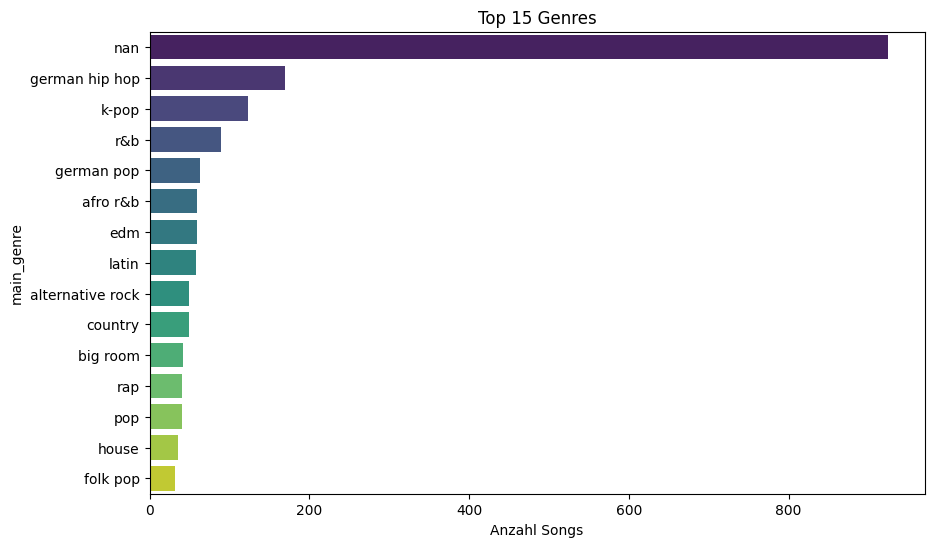

In [18]:
if "artist_genres" in df.columns:
    df["main_genre"] = df["artist_genres"].astype(str).str.split(",").str[0]
    genre_counts = df["main_genre"].value_counts().head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
    plt.title("Top 15 Genres")
    plt.xlabel("Anzahl Songs")
    plt.show()

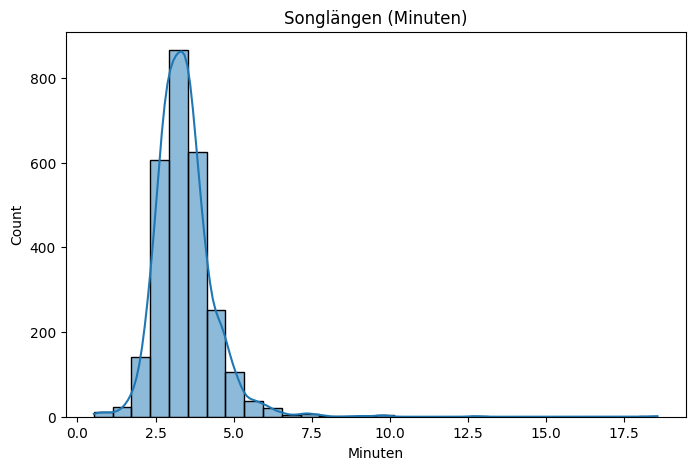

In [19]:
# Song-Längen
if "duration_ms" in df.columns:
    df["duration_min"] = df["duration_ms"] / 60000
    plt.figure(figsize=(8,5))
    sns.histplot(df["duration_min"], bins=30, kde=True)
    plt.title("Songlängen (Minuten)")
    plt.xlabel("Minuten")
    plt.show()